## Support Vector Machines
- SVM is a powerful classifier that works both on linearly and non-linearly separable data
<img src="img/linearly_separable.png" alt="Linear Separable" style="width: 500px;"/>



- Finds an optimal hyperplane, that best separates our data so that the distance from nearest points in space to itself(also called margin) is maximized
- These nearest points are called **Support Vectors**

<figure>
<img src="img/svm_margin.png" alt="Pizza-1" style="width: 300px;"/>

<figcaption>
Image By - <a href="//commons.wikimedia.org/w/index.php?title=User:Larhmam&amp;action=edit&amp;redlink=1" class="new" title="User:Larhmam (page does not exist)">Larhmam</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=73710028">Link</a>
</figcaption>

- For the non-linearly separable case, it uses something called 'Kernel Trick' which will go through in the next part.

    



## What does hyperplane mean ?

<img src="img/hyperplanes.jpg" alt="Hyperplanes" style="width: 250px;"/>

A hyperplane is plane of _n-1_ dimensions in _n_ dimensional feature space, that separates the two classes. 
For a 2-D feature space, it would be a line and for a 3-D Feature space it would be plane and so on.

<img src="img/3d_hyperplane.png" alt="Hyperplanes" style="width: 200px;"/>



A hyperplane is able to separate classes if for all points -

#### **_w_ x** + b > 0 
(For data points in class 1)  
#### **_w_ x** + b < 0 
(For data points in  class 0)

## Maximum Margin Hyperplane 

An optimal hyperplane best separates our data so that the distance/margin from nearest points(called Support Vectors) in space to itself is maximized.

<img src="img/maximum_margin.png" alt="Hyperplanes" style="width: 400px;"/>


### SVM Implementation using Pegasos

**Formulating SVM as Unconstrainted Optimization Problem**

Paper - [Pegasos: Primal Estimated sub-GrAdient SOlver for SVM](http://www.ee.oulu.fi/research/imag/courses/Vedaldi/ShalevSiSr07.pdf)

The final SVM Objective we derived was -

<img src="img/loss.png" alt="Hinge Loss" style="width: 400px;"/>



## Generate Dataset

In [1]:
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

In [4]:
# Convert our Y-Labels into {1,-1}
Y[Y==0] = -1 #Broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

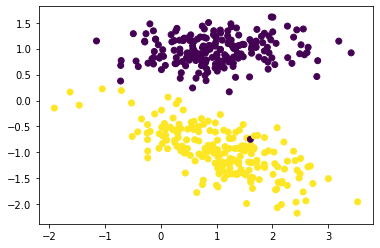

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
import numpy as np

In [7]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    
    
                
                    
        

In [8]:
mySVM = SVM(C=1)
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

400.0
14.973045381035696


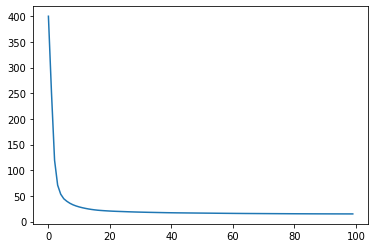

In [9]:
plt.plot(losses)
plt.show()

In [10]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[-0.32231432 -2.03222654]] 0.38700000000000023


In [11]:
def plotHyperplane(w1,w2,b):
    
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
    
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    
    

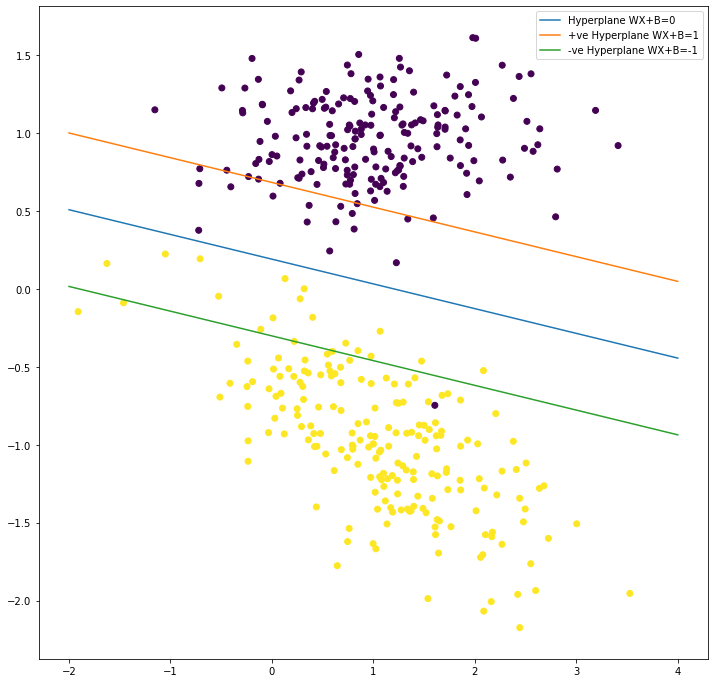

In [12]:
plotHyperplane(W[0,0],W[0,1],B)

## Visualising Support Vectors, Positive and Negative Hyperplanes

In [13]:
# Effect the changing 'C' - Penalty Constant

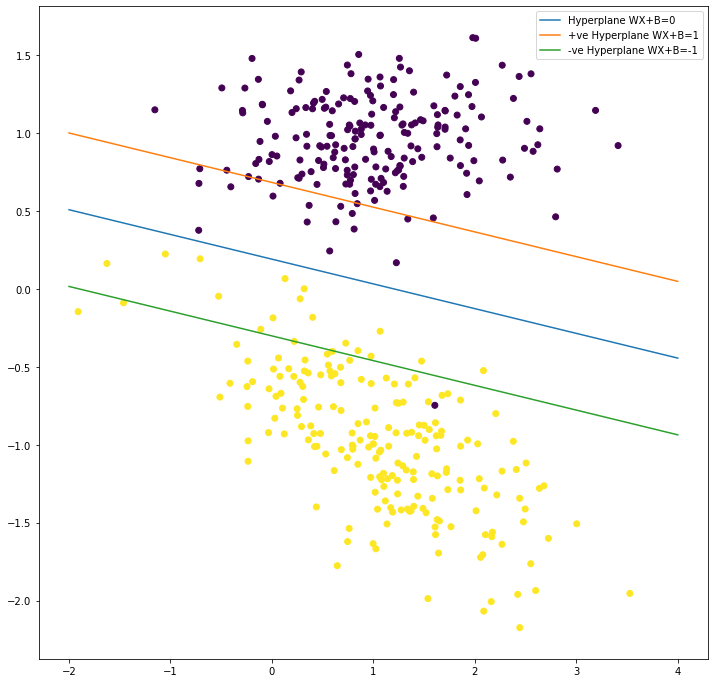

In [14]:
plotHyperplane(W[0,0],W[0,1],B)

In [15]:
losses[650]

IndexError: list index out of range